In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

### Dataset

In [2]:
df1 = pd.read_csv("data/scenario1_baseline.csv")
df2 = pd.read_csv("data/scenario2_malicious.csv")

In [4]:
df1

,epoch,overflow,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,...,penalty_slots_residual,penalty_score,forced_invalid_slots_planned,forced_invalid_slots_realized,forced_invalid_share_pct_of_invalid,penalty_gained,penalty_recovery,penalty_tol,residual_prev_dbg,residual_next_dbg
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,...,0,0.0,0,0,0.0,0.0,9470.0,189.0,0.0,0.0
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,...,0,0.0,0,0,0.0,0.0,7285.0,145.0,0.0,0.0
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,...,0,0.0,0,0,0.0,0.0,7245.0,144.0,0.0,0.0
3,1,OV_1,MAIN_1,9564,39.850,9564,0,0,0,0,...,0,0.0,0,0,0.0,0.0,9564.0,191.0,0.0,0.0
4,1,OV_2,MAIN_2,7261,30.254,7261,0,0,0,0,...,0,0.0,0,0,0.0,0.0,7261.0,145.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,198,OV_2,MAIN_2,7198,29.992,7198,0,0,0,0,...,0,0.0,0,0,0.0,0.0,7198.0,143.0,0.0,0.0
596,198,OV_3,MAIN_3,7179,29.912,7179,0,0,0,0,...,0,0.0,0,0,0.0,0.0,7179.0,143.0,0.0,0.0
597,199,OV_1,MAIN_1,9604,40.017,9604,0,0,0,0,...,0,0.0,0,0,0.0,0.0,9604.0,192.0,0.0,0.0
598,199,OV_2,MAIN_2,7120,29.667,7120,0,0,0,0,...,0,0.0,0,0,0.0,0.0,7120.0,142.0,0.0,0.0


In [9]:
df2

,epoch,overflow,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,...,penalty_slots_residual,penalty_score,forced_invalid_slots_planned,forced_invalid_slots_realized,forced_invalid_share_pct_of_invalid,penalty_gained,penalty_recovery,penalty_tol,residual_prev_dbg,residual_next_dbg
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,...,0,0.0,0,0,0.0,0.0,9470.0,189.0,0.0,0.0
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,...,0,0.0,0,0,0.0,0.0,7285.0,145.0,0.0,0.0
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,...,0,0.0,0,0,0.0,0.0,7245.0,144.0,0.0,0.0
3,1,OV_1,MAIN_1,9564,39.850,9086,0,478,0,478,...,0,0.0,478,478,100.0,1530.0,9086.0,191.0,0.0,0.0
4,1,OV_2,MAIN_2,7261,30.254,7261,0,0,0,0,...,0,0.0,0,0,0.0,0.0,7261.0,145.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,198,OV_2,MAIN_2,7224,30.100,7224,0,0,0,0,...,0,0.0,0,0,0.0,0.0,7224.0,144.0,0.0,0.0
596,198,OV_3,MAIN_3,7220,30.083,7220,0,0,0,0,...,0,0.0,0,0,0.0,0.0,7220.0,144.0,0.0,0.0
597,199,OV_1,MAIN_1,9426,39.275,9426,0,0,0,0,...,0,0.0,0,0,0.0,0.0,9426.0,188.0,0.0,0.0
598,199,OV_2,MAIN_2,7304,30.433,7304,0,0,0,0,...,0,0.0,0,0,0.0,0.0,7304.0,146.0,0.0,0.0


In [3]:
# 2) Normalizzazione nomi colonne
def clean_columns(df):
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "_")
    )
    return df

df1 = clean_columns(df1)
df2 = clean_columns(df2)

In [4]:
df1.columns

Index(['epoch', 'overflow', 'main', 'assigned_slots', 'share_assigned_slots',
       'ok', 'skipped', 'invalid', 'delayed', 'bad_slots_abs',
       'bad_slots_pct_node', 'effective_stake', 'stake_share_pct',
       'effective_stake_next', 'stake_share_next_pct',
       'delivered_slots_share_pct', 'coinbase_epoch_tkg',
       'fees_epoch_tkr_at_main', 'reward_epoch_total_value_tkg_only',
       'coinbase_cum_tkg', 'fees_cum_tkr_at_main', 'penalty_slots_residual',
       'penalty_score', 'forced_invalid_slots_planned',
       'forced_invalid_slots_realized', 'forced_invalid_share_pct_of_invalid',
       'penalty_gained', 'penalty_recovery', 'penalty_tol',
       'residual_prev_dbg', 'residual_next_dbg'],
      dtype='object')

In [7]:
df2.columns

Index(['epoch', 'overflow', 'main', 'assigned_slots', 'share_assigned_slots',
       'ok', 'skipped', 'invalid', 'delayed', 'bad_slots_abs',
       'bad_slots_pct_node', 'effective_stake', 'stake_share_pct',
       'effective_stake_next', 'stake_share_next_pct',
       'delivered_slots_share_pct', 'coinbase_epoch_tkg',
       'fees_epoch_tkr_at_main', 'reward_epoch_total_value_tkg_only',
       'coinbase_cum_tkg', 'fees_cum_tkr_at_main', 'penalty_slots_residual',
       'penalty_score', 'forced_invalid_slots_planned',
       'forced_invalid_slots_realized', 'forced_invalid_share_pct_of_invalid',
       'penalty_gained', 'penalty_recovery', 'penalty_tol',
       'residual_prev_dbg', 'residual_next_dbg'],
      dtype='object')

In [12]:
df1.dtypes

epoch                                    int64
overflow                                object
main                                    object
assigned_slots                           int64
share_assigned_slots                   float64
ok                                       int64
skipped                                  int64
invalid                                  int64
delayed                                  int64
bad_slots_abs                            int64
bad_slots_pct_node                     float64
effective_stake                        float64
stake_share_pct                        float64
effective_stake_next                   float64
stake_share_next_pct                   float64
delivered_slots_share_pct              float64
coinbase_epoch_tkg                     float64
fees_epoch_tkr_at_main                 float64
reward_epoch_total_value_tkg_only      float64
coinbase_cum_tkg                       float64
fees_cum_tkr_at_main                   float64
penalty_slots

In [13]:
df2.dtypes

epoch                                    int64
overflow                                object
main                                    object
assigned_slots                           int64
share_assigned_slots                   float64
ok                                       int64
skipped                                  int64
invalid                                  int64
delayed                                  int64
bad_slots_abs                            int64
bad_slots_pct_node                     float64
effective_stake                        float64
stake_share_pct                        float64
effective_stake_next                   float64
stake_share_next_pct                   float64
delivered_slots_share_pct              float64
coinbase_epoch_tkg                     float64
fees_epoch_tkr_at_main                 float64
reward_epoch_total_value_tkg_only      float64
coinbase_cum_tkg                       float64
fees_cum_tkr_at_main                   float64
penalty_slots

### New features

In [5]:
# df1
df1["ok_rate"] = df1["ok"] / df1["assigned_slots"]
df1["scenario"] = 1
df1["assigned_share"] = df1["assigned_slots"] / 24000

In [6]:
# df2
df2["ok_rate"] = df2["ok"] / df2["assigned_slots"]
df2["scenario"] = 2
df2["assigned_share"] = df2["assigned_slots"] / 24000

df2["malicious_i"] = (df2["overflow"] == "OV_1").astype(int)
df2["post_t"] = (df2["epoch"] >= 50).astype(int)
df2["interaction"] = df2["malicious_i"] * df2["post_t"]

df2["time_since_switch"] = np.where(df2["epoch"] >= 50, df2["epoch"] - 50, 0)

In [7]:
# 4) Concatenazione opzionale
panel = pd.concat([df1, df2], ignore_index=True)

In [8]:
panel

,epoch,overflow,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,...,penalty_tol,residual_prev_dbg,residual_next_dbg,ok_rate,scenario,assigned_share,malicious_i,post_t,interaction,time_since_switch
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,...,189.0,0.0,0.0,1.0,1,0.394583,NaN,NaN,NaN,NaN
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,...,145.0,0.0,0.0,1.0,1,0.303542,NaN,NaN,NaN,NaN
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,...,144.0,0.0,0.0,1.0,1,0.301875,NaN,NaN,NaN,NaN
3,1,OV_1,MAIN_1,9564,39.850,9564,0,0,0,0,...,191.0,0.0,0.0,1.0,1,0.398500,NaN,NaN,NaN,NaN
4,1,OV_2,MAIN_2,7261,30.254,7261,0,0,0,0,...,145.0,0.0,0.0,1.0,1,0.302542,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,198,OV_2,MAIN_2,7224,30.100,7224,0,0,0,0,...,144.0,0.0,0.0,1.0,2,0.301000,0.0,1.0,0.0,148.0
1196,198,OV_3,MAIN_3,7220,30.083,7220,0,0,0,0,...,144.0,0.0,0.0,1.0,2,0.300833,0.0,1.0,0.0,148.0
1197,199,OV_1,MAIN_1,9426,39.275,9426,0,0,0,0,...,188.0,0.0,0.0,1.0,2,0.392750,1.0,1.0,1.0,149.0
1198,199,OV_2,MAIN_2,7304,30.433,7304,0,0,0,0,...,146.0,0.0,0.0,1.0,2,0.304333,0.0,1.0,0.0,149.0


In [9]:
panel.shape

(1200, 38)

In [10]:
panel.columns

Index(['epoch', 'overflow', 'main', 'assigned_slots', 'share_assigned_slots',
       'ok', 'skipped', 'invalid', 'delayed', 'bad_slots_abs',
       'bad_slots_pct_node', 'effective_stake', 'stake_share_pct',
       'effective_stake_next', 'stake_share_next_pct',
       'delivered_slots_share_pct', 'coinbase_epoch_tkg',
       'fees_epoch_tkr_at_main', 'reward_epoch_total_value_tkg_only',
       'coinbase_cum_tkg', 'fees_cum_tkr_at_main', 'penalty_slots_residual',
       'penalty_score', 'forced_invalid_slots_planned',
       'forced_invalid_slots_realized', 'forced_invalid_share_pct_of_invalid',
       'penalty_gained', 'penalty_recovery', 'penalty_tol',
       'residual_prev_dbg', 'residual_next_dbg', 'ok_rate', 'scenario',
       'assigned_share', 'malicious_i', 'post_t', 'interaction',
       'time_since_switch'],
      dtype='object')

In [20]:
panel.head()

,epoch,overflow,main,assigned_slots,share_assigned_slots,ok,skipped,invalid,delayed,bad_slots_abs,...,forced_invalid_slots_planned,forced_invalid_slots_realized,forced_invalid_share_pct_of_invalid,penalty_gained,penalty_recovery,penalty_tol,residual_prev_dbg,residual_next_dbg,ok_rate,scenario
0,0,OV_1,MAIN_1,9470,39.458,9470,0,0,0,0,...,0,0,0.0,0.0,9470.0,189.0,0.0,0.0,1.0,1.0
1,0,OV_2,MAIN_2,7285,30.354,7285,0,0,0,0,...,0,0,0.0,0.0,7285.0,145.0,0.0,0.0,1.0,1.0
2,0,OV_3,MAIN_3,7245,30.188,7245,0,0,0,0,...,0,0,0.0,0.0,7245.0,144.0,0.0,0.0,1.0,1.0
3,1,OV_1,MAIN_1,9564,39.850,9564,0,0,0,0,...,0,0,0.0,0.0,9564.0,191.0,0.0,0.0,1.0,1.0
4,1,OV_2,MAIN_2,7261,30.254,7261,0,0,0,0,...,0,0,0.0,0.0,7261.0,145.0,0.0,0.0,1.0,1.0


In [11]:
# 6) Controlla NaN e valori anomali
panel.isna().sum()

epoch                                    0
overflow                                 0
main                                     0
assigned_slots                           0
share_assigned_slots                     0
ok                                       0
skipped                                  0
invalid                                  0
delayed                                  0
bad_slots_abs                            0
bad_slots_pct_node                       0
effective_stake                          0
stake_share_pct                          0
effective_stake_next                     0
stake_share_next_pct                     0
delivered_slots_share_pct                0
coinbase_epoch_tkg                       0
fees_epoch_tkr_at_main                   0
reward_epoch_total_value_tkg_only        0
coinbase_cum_tkg                         0
fees_cum_tkr_at_main                     0
penalty_slots_residual                   0
penalty_score                            0
forced_inva

In [12]:
df1.isna().sum()

epoch                                  0
overflow                               0
main                                   0
assigned_slots                         0
share_assigned_slots                   0
ok                                     0
skipped                                0
invalid                                0
delayed                                0
bad_slots_abs                          0
bad_slots_pct_node                     0
effective_stake                        0
stake_share_pct                        0
effective_stake_next                   0
stake_share_next_pct                   0
delivered_slots_share_pct              0
coinbase_epoch_tkg                     0
fees_epoch_tkr_at_main                 0
reward_epoch_total_value_tkg_only      0
coinbase_cum_tkg                       0
fees_cum_tkr_at_main                   0
penalty_slots_residual                 0
penalty_score                          0
forced_invalid_slots_planned           0
forced_invalid_s

In [13]:
df2.isna().sum()

epoch                                  0
overflow                               0
main                                   0
assigned_slots                         0
share_assigned_slots                   0
ok                                     0
skipped                                0
invalid                                0
delayed                                0
bad_slots_abs                          0
bad_slots_pct_node                     0
effective_stake                        0
stake_share_pct                        0
effective_stake_next                   0
stake_share_next_pct                   0
delivered_slots_share_pct              0
coinbase_epoch_tkg                     0
fees_epoch_tkr_at_main                 0
reward_epoch_total_value_tkg_only      0
coinbase_cum_tkg                       0
fees_cum_tkr_at_main                   0
penalty_slots_residual                 0
penalty_score                          0
forced_invalid_slots_planned           0
forced_invalid_s

In [14]:
df1.to_csv("dataset/scenario1.csv", index=False)
df2.to_csv("dataset/scenario2.csv", index=False)
panel.to_csv("dataset/panel.csv", index=False)

### Sanity checks

In [15]:
pd.set_option("display.max_columns", None)  # mostra tutte le colonne
pd.set_option("display.width", 0)           # evita il troncamento orizzontale

In [16]:
df1.groupby("overflow").describe()

epoch                                                    \
          count  mean        std  min    25%   50%     75%    max   
overflow                                                            
OV_1      200.0  99.5  57.879185  0.0  49.75  99.5  149.25  199.0   
OV_2      200.0  99.5  57.879185  0.0  49.75  99.5  149.25  199.0   
OV_3      200.0  99.5  57.879185  0.0  49.75  99.5  149.25  199.0   

         assigned_slots                                                \
                  count      mean        std     min      25%     50%   
overflow                                                                
OV_1              200.0  9597.165  72.590874  9409.0  9542.75  9601.0   
OV_2              200.0  7200.415  71.886795  7040.0  7151.75  7198.5   
OV_3              200.0  7202.420  67.781452  7019.0  7158.75  7196.5   

                          share_assigned_slots                               \
              75%     max                count       mean       std     min   
overflow                                                                      
OV_1      9649.00  9794.0                200.0  39.988145  0.302464  39.204   
OV_2      7250.50  7383.0                200.0  30.001735  0.299493  29.333   
OV_3      7251.25  7348.0                200.0  30.010050  0.282411  29.246   

                                                  ok                       \
               25%      50%       75%     max  count      mean        std   
overflow                                                                    
OV_1      39.76175  40.0040  40.20400  40.808  200.0  9597.165  72.590874   
OV_2      29.79900  29.9940  30.21025  30.762  200.0  7200.415  71.886795   
OV_3      29.82800  29.9855  30.21325  30.617  200.0  7202.420  67.781452   

                                                   skipped                 \
             min      25%     50%      75%     max   count mean  std  min   
overflow                                                                    
OV_1      9409.0  9542.75  9601.0  9649.00  9794.0   200.0  0.0  0.0  0.0   
OV_2      7040.0  7151.75  7198.5  7250.50  7383.0   200.0  0.0  0.0  0.0   
OV_3      7019.0  7158.75  7196.5  7251.25  7348.0   200.0  0.0  0.0  0.0   

                             invalid                                     \
          25%  50%  75%  max   count mean  std  min  25%  50%  75%  max   
overflow                                                                  
OV_1      0.0  0.0  0.0  0.0   200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
OV_2      0.0  0.0  0.0  0.0   200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
OV_3      0.0  0.0  0.0  0.0   200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         delayed                                    bad_slots_abs            \
           count mean  std  min  25%  50%  75%  max         count mean  std   
overflow                                                                      
OV_1       200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         200.0  0.0  0.0   
OV_2       200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         200.0  0.0  0.0   
OV_3       200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         200.0  0.0  0.0   

                                  bad_slots_pct_node                           \
          min  25%  50%  75%  max              count mean  std  min  25%  50%   
overflow                                                                        
OV_1      0.0  0.0  0.0  0.0  0.0              200.0  0.0  0.0  0.0  0.0  0.0   
OV_2      0.0  0.0  0.0  0.0  0.0              200.0  0.0  0.0  0.0  0.0  0.0   
OV_3      0.0  0.0  0.0  0.0  0.0              200.0  0.0  0.0  0.0  0.0  0.0   

                   effective_stake                                            \
          75%  max           count        mean        std    min         25%   
overflow                                                                       
OV_1      0.0  0.0           200.0  495.470824  55.553763  400.0  447.722725   
OV_2      0.0  0.0    

In [17]:
df2.groupby("overflow").describe()

epoch                                                    \
          count  mean        std  min    25%   50%     75%    max   
overflow                                                            
OV_1      200.0  99.5  57.879185  0.0  49.75  99.5  149.25  199.0   
OV_2      200.0  99.5  57.879185  0.0  49.75  99.5  149.25  199.0   
OV_3      200.0  99.5  57.879185  0.0  49.75  99.5  149.25  199.0   

         assigned_slots                                                        \
                  count     mean        std     min      25%     50%      75%   
overflow                                                                        
OV_1              200.0  9576.91  79.093494  9361.0  9524.00  9578.5  9634.00   
OV_2              200.0  7216.11  70.539899  7030.0  7170.00  7219.5  7263.00   
OV_3              200.0  7206.98  69.169805  6978.0  7152.75  7206.5  7256.25   

                 share_assigned_slots                                       \
             max                count       mean       std     min     25%   
overflow                                                                     
OV_1      9787.0                200.0  39.903755  0.329589  39.004  39.683   
OV_2      7413.0                200.0  30.067120  0.293908  29.292  29.875   
OV_3      7400.0                200.0  30.029055  0.288176  29.075  29.803   

                                        ok                                \
              50%       75%     max  count      mean         std     min   
overflow                                                                   
OV_1      39.9105  40.14200  40.779  200.0  9459.460  210.164158  8893.0   
OV_2      30.0810  30.26200  30.888  200.0  7216.110   70.539899  7030.0   
OV_3      30.0270  30.23425  30.833  200.0  7206.975   69.174925  6978.0   

                                           skipped                           \
              25%     50%      75%     max   count mean  std  min  25%  50%   
overflow                                                                      
OV_1      9395.00  9540.0  9616.00  9787.0   200.0  0.0  0.0  0.0  0.0  0.0   
OV_2      7170.00  7219.5  7263.00  7413.0   200.0  0.0  0.0  0.0  0.0  0.0   
OV_3      7152.75  7206.5  7256.25  7400.0   200.0  0.0  0.0  0.0  0.0  0.0   

                   invalid                                                  \
          75%  max   count     mean         std  min  25%  50%  75%    max   
overflow                                                                     
OV_1      0.0  0.0   200.0  117.450  206.703651  0.0  0.0  0.0  0.0  489.0   
OV_2      0.0  0.0   200.0    0.000    0.000000  0.0  0.0  0.0  0.0    0.0   
OV_3      0.0  0.0   200.0    0.005    0.070711  0.0  0.0  0.0  0.0    1.0   

         delayed                                    bad_slots_abs           \
           count mean  std  min  25%  50%  75%  max         count     mean   
overflow                                                                     
OV_1       200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         200.0  117.450   
OV_2       200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         200.0    0.000   
OV_3       200.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         200.0    0.005   

                                                bad_slots_pct_node           \
                 std  min  25%  50%  75%    max              count     mean   
overflow                                                                      
OV_1      206.703651  0.0  0.0  0.0  0.0  489.0              200.0  1.22385   
OV_2        0.000000  0.0  0.0  0.0  0.0    0.0              200.0  0.00000   
OV_3        0.070711  0.0  0.0  0.0  0.0    1.0              200.0  0.00005   

                                             effective_stake              \
               std  min  25%  50%  75%   max           count        mean   
overflow                                                                   
OV_1      2.153810  0.0  0.0  0.0  0.0  5.00           200.0  493.

### DF1

In [18]:
df1 = df1.rename(columns={"overflow": "node"})

metrics = ["ok_rate", "reward_epoch_total_value_tkg_only", "stake_share_pct", "penalty_slots_residual"]
title_map = {
    "ok_rate": "ok_rate over time (Scenario 1)",
    "reward_epoch_total_value_tkg_only": "reward_total over time (Scenario 1)",
    "stake_share_pct": "_stake_share_pct over time (Scenario 1)",
    "penalty_slots_residual": "penalty_residual over time (Scenario 1)",
}

nodes = sorted(df1["node"].unique())
vline_epoch = 50  # linea verticale coerente con lo scenario 2 per confronto visuale

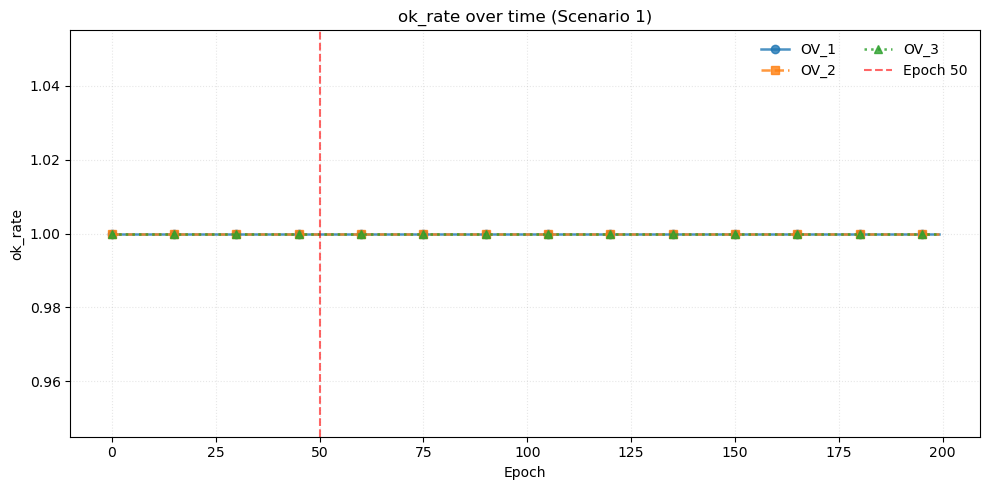

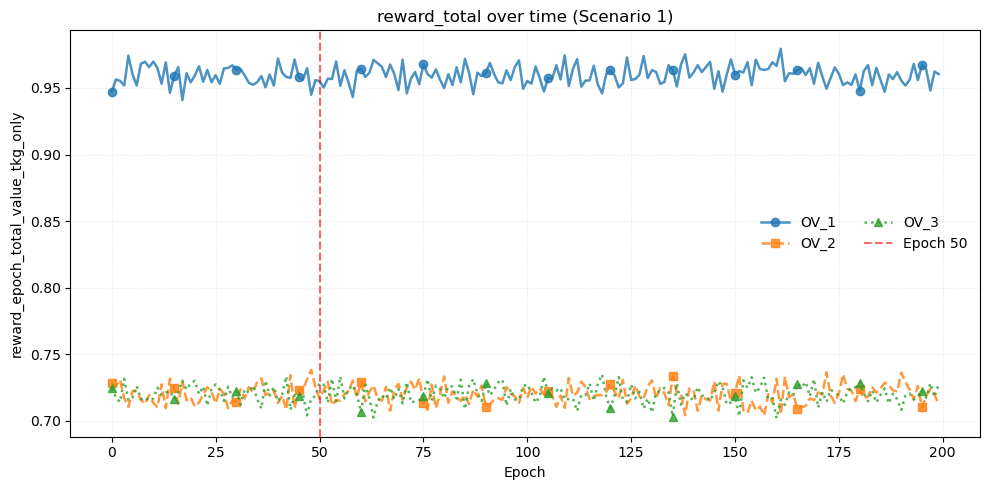

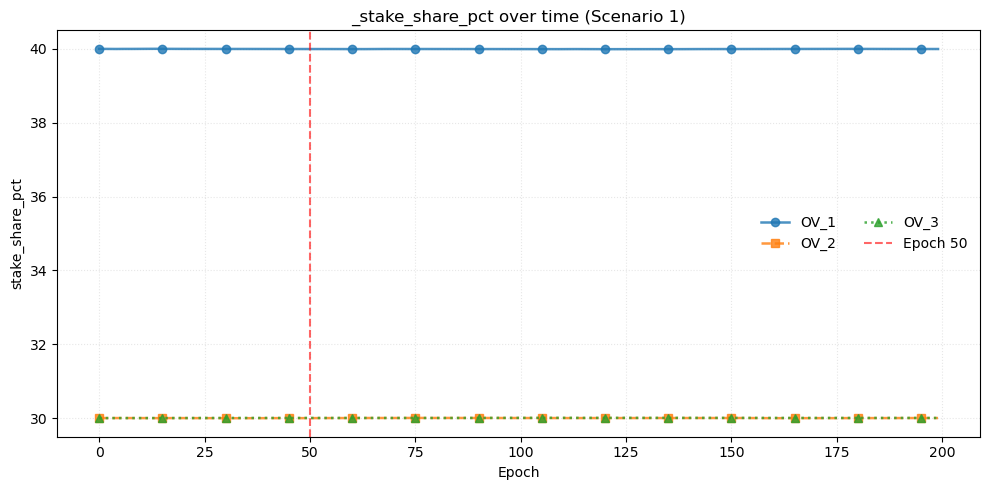

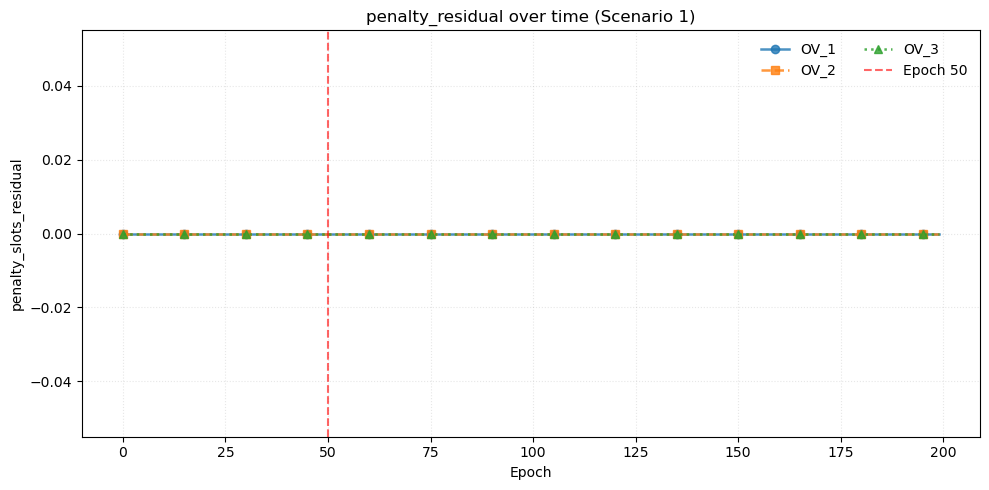

In [19]:
# Palette colori e stili
colors = plt.cm.tab10.colors           # 10 colori diversi
linestyles = ["-", "--", ":", "-."]    # alterna stili per distinguere meglio
markers = ["o", "s", "^", "D", "x", "v", "P", "*"]  # marker visibili

for var in metrics:
    if var not in df1.columns:
        continue  # salta se colonna mancante

    plt.figure(figsize=(10, 5))

    # Ciclo sui nodi con combinazione unica (colore + stile + marker)
    for (nd, color, ls, mk) in zip(nodes, colors, itertools.cycle(linestyles), itertools.cycle(markers)):
        sub = df1[df1["node"] == nd]

        plt.plot(
            sub["epoch"],
            sub[var],
            label=str(nd),
            color=color,
            linestyle=ls,
            marker=mk,
            markevery=15,     # ogni 15 punti mette un marker
            alpha=0.8,        # trasparenza per vedere sovrapposizioni
            linewidth=1.8
        )

    # Linea verticale a epoch 50 (riferimento redenzione)
    plt.axvline(vline_epoch, linestyle="--", color="red", alpha=0.6, label="Epoch 50")

    # Titoli e asse
    plt.xlabel("Epoch")
    plt.ylabel(var)
    plt.title(title_map.get(var, f"{var} over time (Scenario 1)"))
    plt.legend(frameon=False, ncol=len(nodes)//2 + 1)
    plt.grid(alpha=0.3, linestyle=":")
    plt.tight_layout()

    # Salva e mostra
    out_path = f"fig/scen1_{var}_timeseries.png"
    plt.savefig(out_path, dpi=200)
    plt.show()


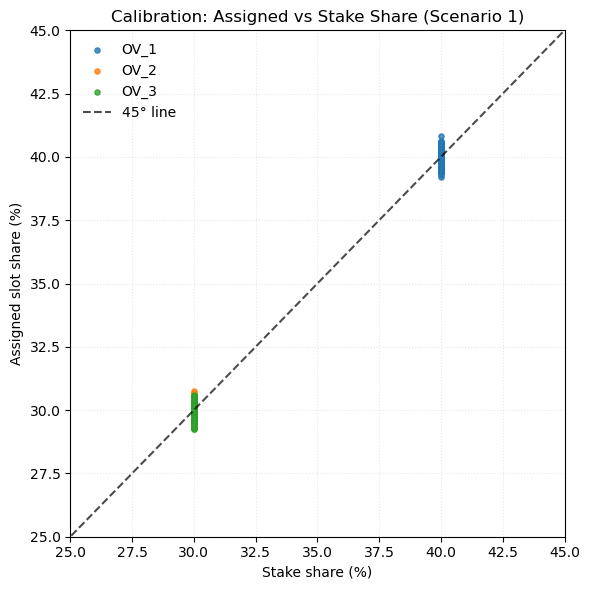

In [20]:
plt.figure(figsize=(6, 6))

# Scatter per ogni nodo
for nd in df1["node"].unique():
    sub = df1[df1["node"] == nd]
    plt.scatter(
        sub["stake_share_pct"],
        sub["share_assigned_slots"],
        s=14,
        label=str(nd),
        alpha=0.8
    )

# Linea 45° coerente con scala 0–100
lo, hi = 0, 100
plt.plot([lo, hi], [lo, hi], color="black", linestyle="--", alpha=0.7, label="45° line")

plt.xlim(25, 45)
plt.ylim(25, 45)
plt.xlabel("Stake share (%)")
plt.ylabel("Assigned slot share (%)")
plt.title("Calibration: Assigned vs Stake Share (Scenario 1)")
plt.legend(frameon=False)
plt.grid(alpha=0.3, linestyle=":")
plt.tight_layout()
# --- Salvataggio ---
out_path = "fig/scen1_calibration.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()

### DF2

In [21]:
df2 = df2.rename(columns={"overflow": "node"})

metrics = ["ok_rate", "reward_epoch_total_value_tkg_only", "stake_share_pct", "penalty_slots_residual"]
title_map = {
    "ok_rate": "ok_rate over time (Scenario 2)",
    "reward_epoch_total_value_tkg_only": "reward_total over time (Scenario 2)",
    "stake_share_pct": "_stake_share_pct over time (Scenario 2)",
    "penalty_slots_residual": "penalty_residual over time (Scenario 2)",
}

nodes = sorted(df2["node"].unique())
vline_epoch = 50  # linea verticale coerente con lo scenario 2 per confronto visuale

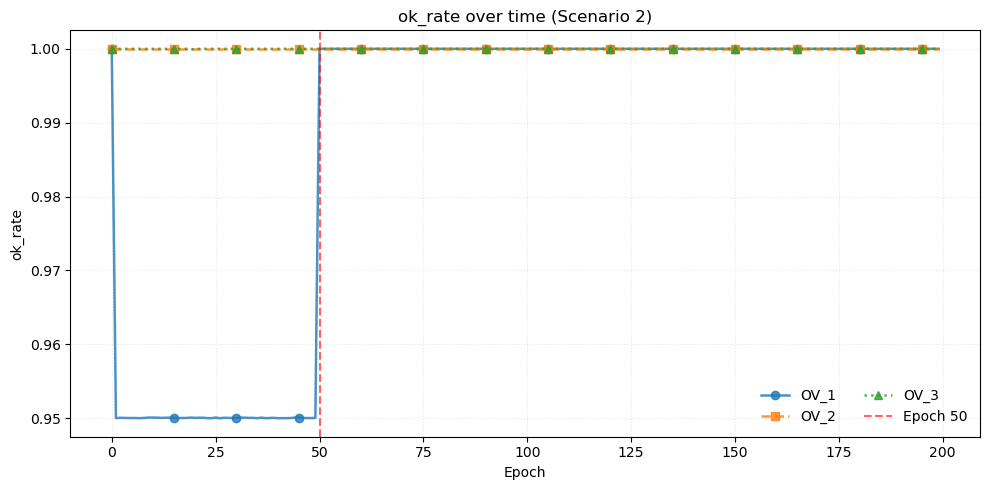

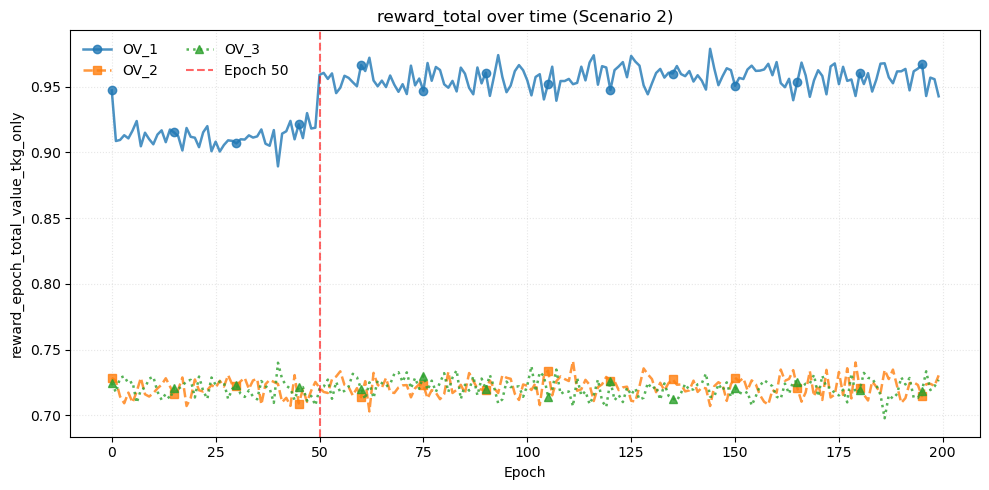

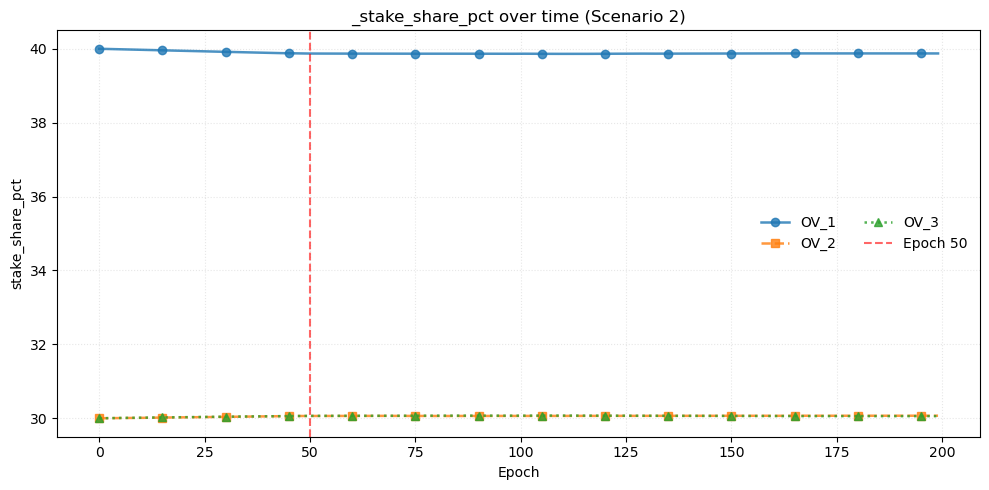

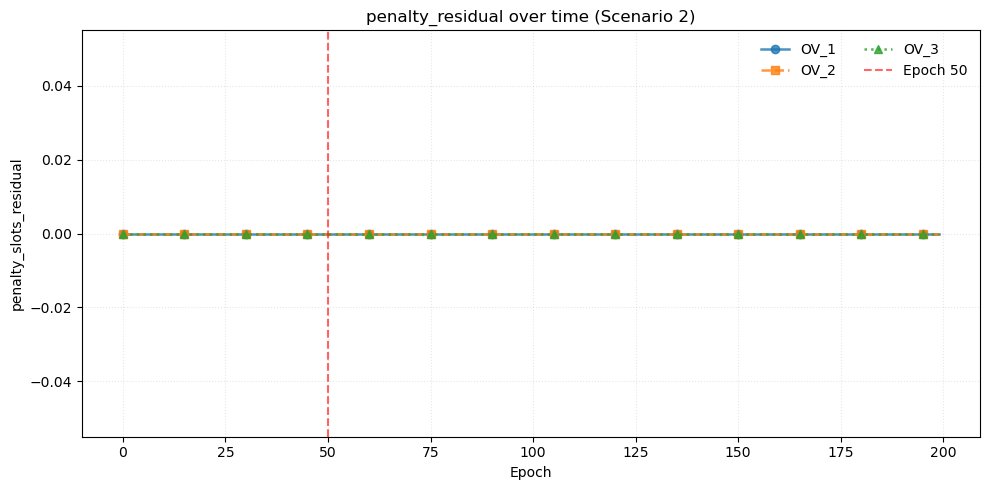

In [22]:
# Palette colori e stili
colors = plt.cm.tab10.colors           # 10 colori diversi
linestyles = ["-", "--", ":", "-."]    # alterna stili per distinguere meglio
markers = ["o", "s", "^", "D", "x", "v", "P", "*"]  # marker visibili

for var in metrics:
    if var not in df2.columns:
        continue  # salta se colonna mancante

    plt.figure(figsize=(10, 5))

    # Ciclo sui nodi con combinazione unica (colore + stile + marker)
    for (nd, color, ls, mk) in zip(nodes, colors, itertools.cycle(linestyles), itertools.cycle(markers)):
        sub = df2[df2["node"] == nd]

        plt.plot(
            sub["epoch"],
            sub[var],
            label=str(nd),
            color=color,
            linestyle=ls,
            marker=mk,
            markevery=15,     # ogni 15 punti mette un marker
            alpha=0.8,        # trasparenza per vedere sovrapposizioni
            linewidth=1.8
        )

    # Linea verticale a epoch 50 (riferimento redenzione)
    plt.axvline(vline_epoch, linestyle="--", color="red", alpha=0.6, label="Epoch 50")

    # Titoli e asse
    plt.xlabel("Epoch")
    plt.ylabel(var)
    plt.title(title_map.get(var, f"{var} over time (Scenario 1)"))
    plt.legend(frameon=False, ncol=len(nodes)//2 + 1)
    plt.grid(alpha=0.3, linestyle=":")
    plt.tight_layout()

    # Salva e mostra
    out_path = f"fig/scen2_{var}_timeseries.png"
    plt.savefig(out_path, dpi=200)
    plt.show()

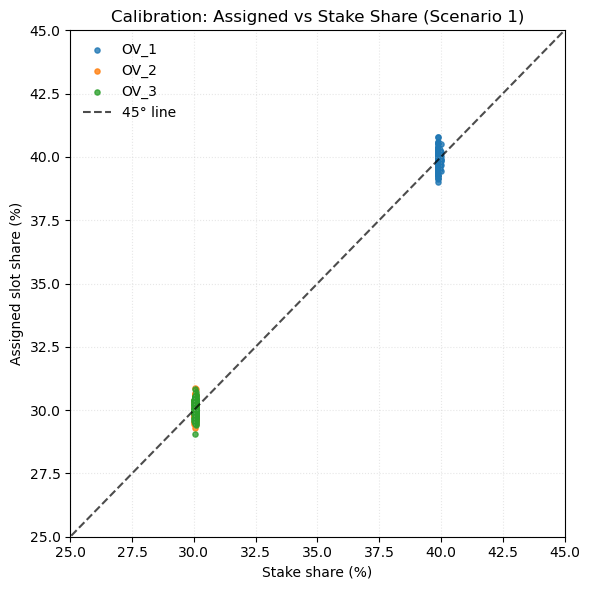

In [23]:
plt.figure(figsize=(6, 6))

# Scatter per ogni nodo
for nd in df2["node"].unique():
    sub = df2[df2["node"] == nd]
    plt.scatter(
        sub["stake_share_pct"],
        sub["share_assigned_slots"],
        s=14,
        label=str(nd),
        alpha=0.8
    )

# Linea 45° coerente con scala 0–100
lo, hi = 0, 100
plt.plot([lo, hi], [lo, hi], color="black", linestyle="--", alpha=0.7, label="45° line")

plt.xlim(25, 45)
plt.ylim(25, 45)
plt.xlabel("Stake share (%)")
plt.ylabel("Assigned slot share (%)")
plt.title("Calibration: Assigned vs Stake Share (Scenario 1)")
plt.legend(frameon=False)
plt.grid(alpha=0.3, linestyle=":")
plt.tight_layout()
# --- Salvataggio ---
out_path = "fig/scen2_calibration.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()